<a href="https://colab.research.google.com/github/nr3nov/ML-Supermart-Grocery-Sales/blob/main/ML_Supermart_Grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
data= pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [18]:
data.head(20)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


## Exploratory Data Analysis

In [5]:
data.shape

(9994, 11)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [8]:
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
data.duplicated().sum()

np.int64(0)

## Data Preprocessing

In [ ]:
# there are no null values and no duplicates in the data

## Convert Date Columns to DateTime Format

In [20]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')

# extract day, month, year from order date
data['order month_no'] = data['Order Date'].dt.month
data['order month'] = data['Order Date'].dt.month_name()
data['order year'] = data['Order Date'].dt.year
data['order day'] = data['Order Date'].dt.day


In [23]:
data.tail(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,order month_no,order month,order year,order day
9984,OD9985,Willams,Oil & Masala,Masalas,Trichy,2016-08-31,West,727,0.17,109.05,Tamil Nadu,8,August,2016,31
9985,OD9986,Shree,"Eggs, Meat & Fish",Mutton,Kanyakumari,2016-11-13,West,1286,0.30,475.82,Tamil Nadu,11,November,2016,13
9986,OD9987,Peer,Bakery,Biscuits,Vellore,2018-05-08,West,2199,0.34,153.93,Tamil Nadu,5,May,2018,8
9987,OD9988,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,2015-10-19,West,1350,0.15,67.50,Tamil Nadu,10,October,2015,19
9988,OD9989,Jackson,Snacks,Cookies,Vellore,2016-11-03,West,1460,0.15,452.60,Tamil Nadu,11,November,2016,3
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,12,December,2015,24
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7,July,2015,12
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6,June,2017,6
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,10,October,2018,16
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,2018-04-17,West,1034,0.28,165.44,Tamil Nadu,4,April,2018,17


In [55]:
data['Region'].value_counts()

,count
Region,
4,3203
1,2848
0,2323
3,1619
2,1


## EDA: Plots to explore data

1. Distribution of sales by category

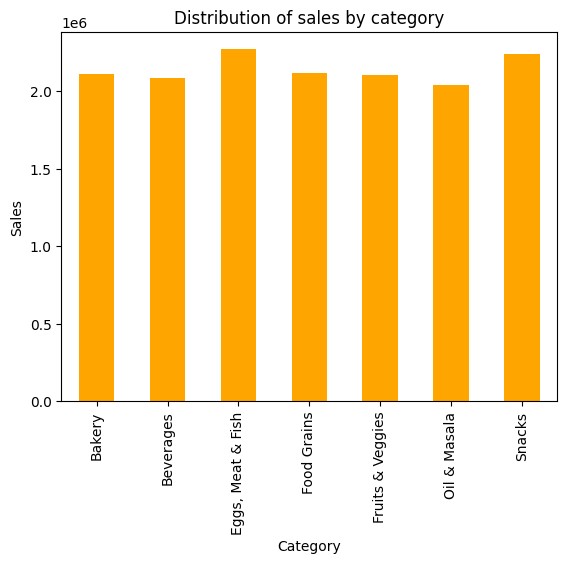

In [ ]:
plt.figure('figsize(14,6)')
data.groupby('Category')['Sales'].sum().plot(kind='bar', color = 'orange')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Distribution of sales by category')
plt.show()


2. Sales Trend over Time


Total Sales by Month

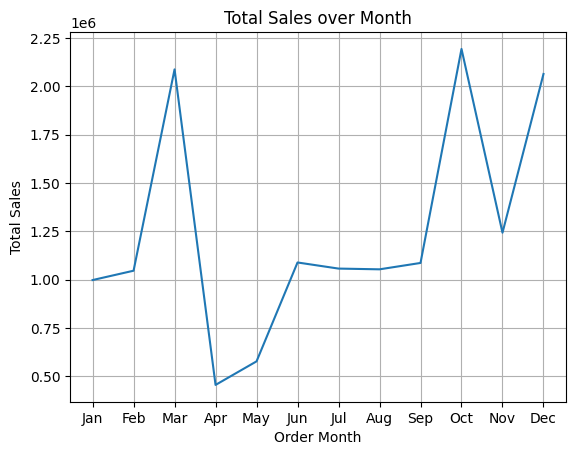

In [11]:
plt.figure('figsize(14,8)')
monthly_sales = data.groupby('order month')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by = 'order month')
plt.plot(monthly_sales_sorted['order month'], monthly_sales_sorted['Sales'])
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.title('Total Sales over Month')
plt.xticks(monthly_sales_sorted['order month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
cleaned_data = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'order month', 'order year', 'order day'])
cleaned_data.head()

3. Correlation Heatmap

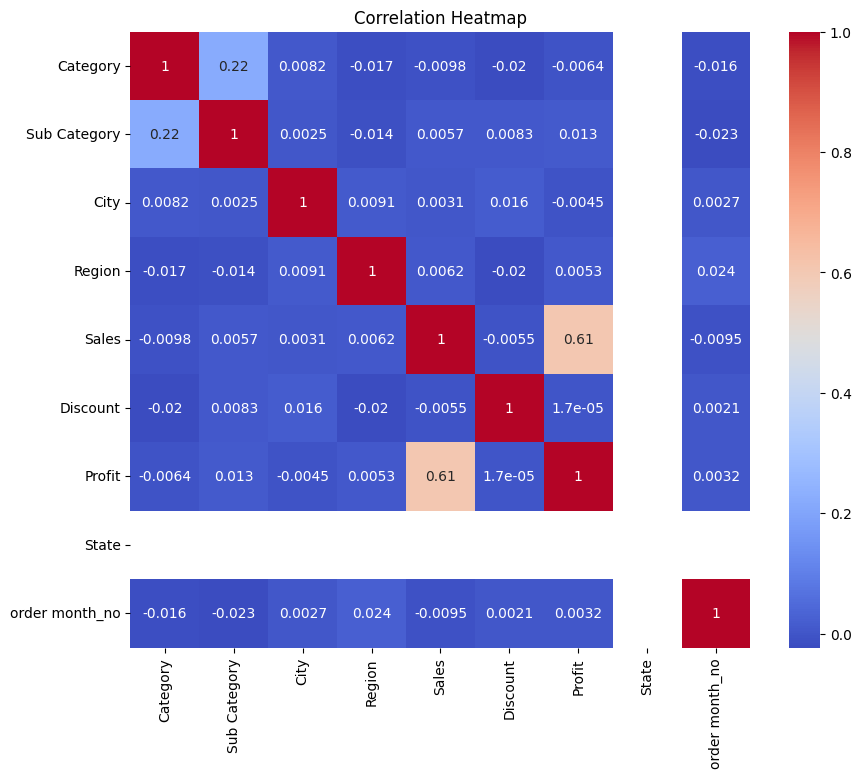

In [69]:
# Examinig correlation value
# Correlation analysis cannot be used for categorical values.

plt.figure(figsize=(10,8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

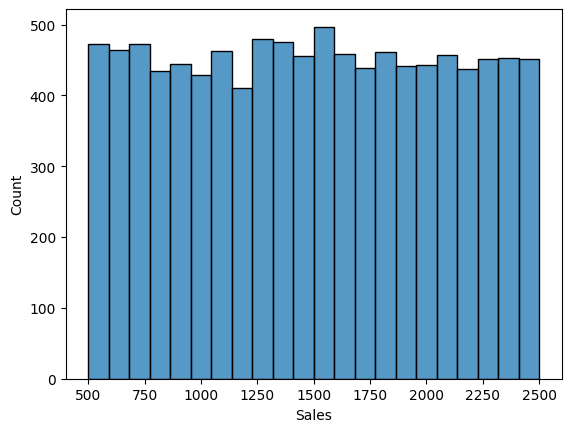

In [99]:
sns.histplot(data['Sales'])

<ipython-input-101-cc3de46fe282>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Sales"], shade = True)


<Axes: xlabel='Sales', ylabel='Density'>

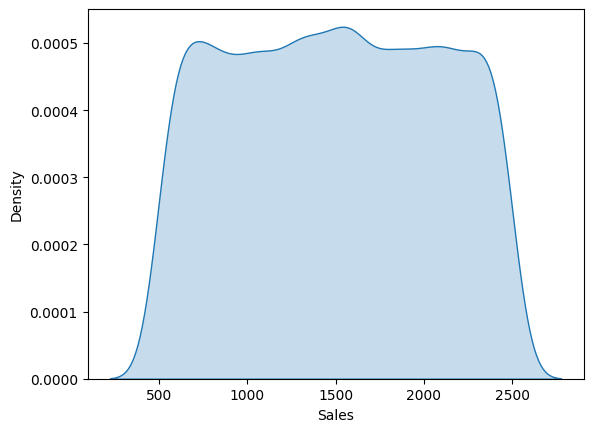

In [101]:
# Kernal Density Estimation plot
sns.kdeplot(data["Sales"], shade = True)

##Label Encoding Technique
Convert categorical variables such as Category, Sub Category, City, Region,State into numerical values.

In [107]:
# Converting categorical values into numerical using Label Encoding

le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['City'] = le.fit_transform(data['City'])

In [108]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,order month_no,order month,order year,order day
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,11,November,2017,8
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,11,November,2017,8
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,6,June,2017,12
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,10,October,2016,11
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,10,October,2016,11


## Feature Selection and Model Building

In [60]:
#Select features and target or output variable

features = data.drop(columns= ['Order ID', 'Customer Name','Order Date','State','Sales', 'order month', 'order year', 'order day'])
target = data['Sales']

In [61]:
features

,Category,Sub Category,City,Region,Discount,Profit,order month_no
0,5,14,21,2,0.12,401.28,11
1,1,13,8,3,0.18,149.80,11
2,3,0,13,4,0.21,165.20,6
3,4,12,4,3,0.25,89.60,10
4,3,18,12,3,0.26,918.45,10
...,...,...,...,...,...,...,...
9989,2,9,9,4,0.16,359.10,12
9990,0,1,6,4,0.26,71.70,7
9991,3,20,0,4,0.16,501.44,6
9992,5,22,14,4,0.15,597.24,10


## Train Test Split

In [70]:
X_train,X_test, y_train,y_test= train_test_split(features,target,test_size= 0.25, random_state =101)


## Feature Scaling using Standard Scalar

* Perform to create same scale for all variables.
* Hence, all variables will have similar influnece on the
    model

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [72]:
X_train

array([[ 1.49259705,  0.73698191,  1.67881465, ..., -1.57514957,
         1.93417376, -0.25342527],
       [ 0.99408919, -0.46053131,  0.23397032, ...,  0.84908357,
        -0.61892086,  0.97378998],
       [-1.49845011, -1.50835537, -1.21087401, ...,  1.25312242,
         1.73390804, -2.09424814],
       ...,
       [-0.00292653,  1.03636021,  0.81190805, ..., -0.09367376,
        -0.5077273 ,  0.97378998],
       [ 0.49558133,  1.18604936, -1.35535844, ..., -0.63239224,
         1.7946581 , -0.25342527],
       [-0.99994225,  0.28791445, -1.21087401, ...,  0.71440395,
        -0.98396588, -1.48064052]])

In [73]:
X_test

array([[-0.50143439, -0.31084216,  1.67881465, ..., -1.57514957,
        -0.17154903,  0.36018235],
       [-0.00292653, -0.61022046,  0.37845475, ..., -0.363033  ,
        -1.03336196, -1.48064052],
       [ 0.99408919,  0.4376036 ,  1.53433022, ..., -0.09367376,
         0.2966873 , -0.86703289],
       ...,
       [ 1.49259705, -0.90959876, -0.05499854, ...,  0.71440395,
         1.30069726,  0.97378998],
       [ 0.99408919,  1.63511682,  0.08948589, ...,  1.52248166,
        -0.36695474,  0.36018235],
       [ 0.99408919, -0.46053131, -1.21087401, ..., -0.49771262,
         1.68958144, -1.1738367 ]])

##Training the model using Linear Regression Model

In [82]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [-4.90396521e+00 -2.65866374e+00  5.71997336e+00  3.98526874e+00
  3.36369018e-01  3.48916723e+02 -8.08150132e+00]


In [85]:
# predict the model
y_pred= lm.predict(X_test)

## Evaluate the Model
Evaluate the model performance using Mean Squared Error (MSE) and R-squared.


In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('R-Squared : ', r2)

Mean Squared Error:  201463.46093170933
R-Squared :  0.3788509113201062


* The coefficient of determination (R²) is only used for simple linear regression
* For multiple linear regression, we use adjusted R².
* Adjusted R-squared, a modified version of R-squared, adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.
* It will always be smaller than R-squared value.

In [96]:
N=features.shape[0] # shape is 0
p=7 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.378415497378512


## Mean of residuals
* It should be close to zero



In [90]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -18.486835901324923


It is close to 0. Hence, good.

## Homoscedasticity

* Homoscedasticity means that they are roughly the same throughout, which means your residuals do not suddenly get larger

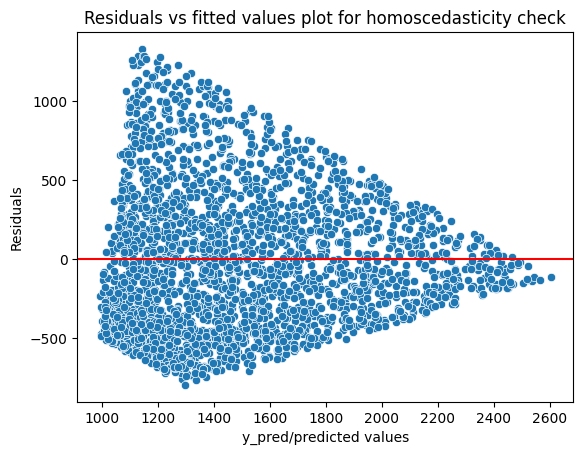

In [93]:
p = sns.scatterplot(x=y_pred, y=residuals)
p = plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#p = sns.lineplot([0,2.6],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<Axes: xlabel='Sales', ylabel='Count'>

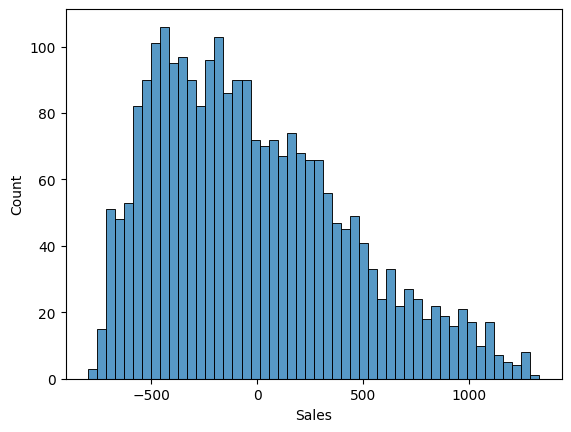

In [104]:
sns.histplot((y_test-y_pred),bins=50)

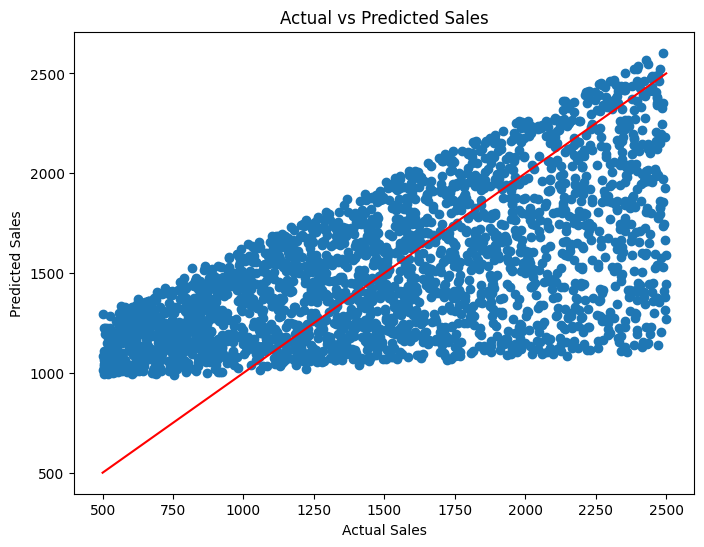

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()